## DECISION_TREE MODEL TO TITANIC_DATASET

##  INTRODUCTION
This project demonstrates the use of Decision Tree algorithms for classification tasks using Python. Decision Trees are supervised learning models that split data into branches to make predictions. They are easy to interpret, visualize, and useful for understanding feature importance in datasets.

In this project, we apply a Decision Tree to classify data and evaluate its performance using metrics such as accuracy, confusion matrix, and classification reports

##  TOOLS & LIBRARIES

* Python – Programming language used.

* Pandas – For data manipulation and preprocessing.

* NumPy – For numerical computations.

* Scikit-learn – Machine learning library used for Decision Tree implementation.

* Matplotlib & Seaborn – Data visualization.

##  KEY CONCEPTS

## Decision Tree

* Root Node: The top node representing the entire dataset.

* Internal Nodes: Represent features that split the data.

* Leaf Nodes: Represent the final class labels.

## Workflow

1.Load and preprocess the dataset.

2.Handle missing values using SimpleImputer.

3.Split data into training and testing sets.

4.Train the Decision Tree classifier.

5.Predict results on the test set.

6.Evaluate performance with accuracy_score, confusion_matrix, and classification_report.
 ##  INSIGHTS & IMPORTANT POINTS

* Decision Trees can easily handle both numerical and categorical data.

* They are prone to overfitting, especially on small datasets. Using techniques like pruning or max_depth can improve generalization.

* Feature importance can help identify which variables are most influential for classification.

* Visualizations such as tree plots or confusion matrices provide clarity on model decisions.

## 1.Import libraries.

In [43]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split  #break data into train/test.
from sklearn.tree import DecisionTreeClassifier, plot_tree #the decision tree model. ,visualize the model.
from sklearn.impute import SimpleImputer #handle missing data (NaN values) in datasets.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #measure performance.[classification_report, confusion_matrix, and accuracy_score from sklearn.metrics, which are tools to evaluate a model’s performance by showing detailed metrics, error distribution, and overall accuracy.]
import matplotlib.pyplot as plt
import seaborn as sns 


## 2.Load Titanic data.

In [44]:
# Load data
data = pd.read_csv('Titanic-Dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3.Select important columns.

In [45]:
# Select features and copy to avoid SettingWithCopyWarning
X = data[["Pclass", "Age", "Sex", "Fare"]].copy()
y = data["Survived"].copy()
print(X ,y)

     Pclass   Age     Sex     Fare
0         3  22.0    male   7.2500
1         1  38.0  female  71.2833
2         3  26.0  female   7.9250
3         1  35.0  female  53.1000
4         3  35.0    male   8.0500
..      ...   ...     ...      ...
886       2  27.0    male  13.0000
887       1  19.0  female  30.0000
888       3   NaN  female  23.4500
889       1  26.0    male  30.0000
890       3  32.0    male   7.7500

[891 rows x 4 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## 4.Convert text to numbers.

In [46]:
# Encode Sex safely
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

## 5.Handle missing values.

In [47]:
# Impute missing ages with the median (better than filling with 0)
age_imputer = SimpleImputer(strategy='median')
X['Age'] = age_imputer.fit_transform(X[['Age']])
X['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [48]:
# If Fare has missing values, impute median too
fare_imputer = SimpleImputer(strategy='median')
X['Fare'] = fare_imputer.fit_transform(X[['Fare']])
X['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

## 6.Split into train/test sets.

In [49]:
# Train-test split with stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 7.Build & train decision tree.

In [50]:
# Build tree (with reproducible randomness)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 8.Predict on test data & Check accuracy and results.

In [51]:
# Predict & evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

Confusion matrix:
 [[96 14]
 [24 45]]


## 9.Visualize tree.

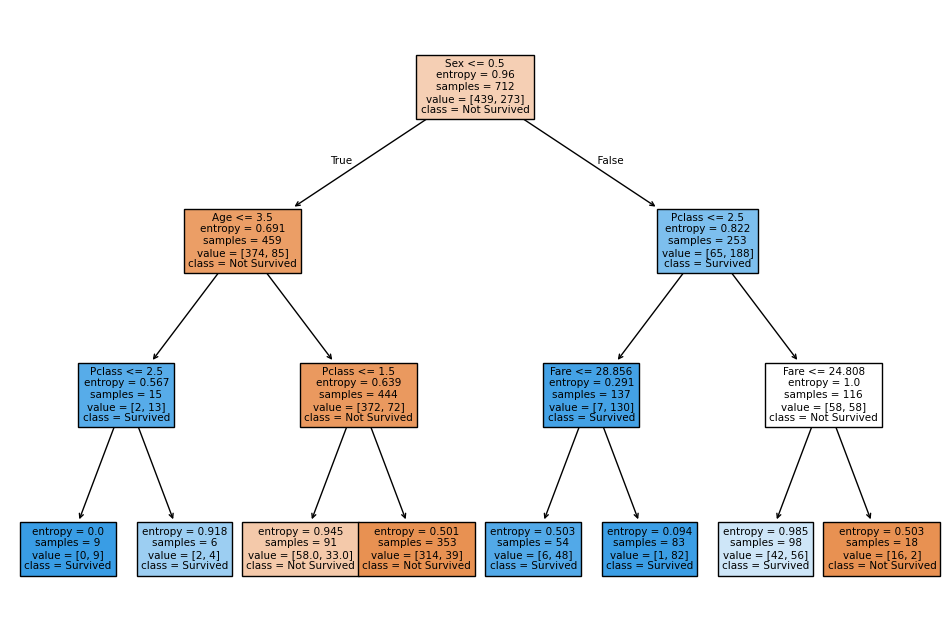

In [52]:
# Visualize
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True)
plt.show()

## 📌 Conclusion

Decision Trees provide interpretable models for classification.

Proper preprocessing and evaluation are key for reliable results.

This project can be extended to Random Forests or Gradient Boosted Trees for higher accuracy.